# Merging Fire and Climate Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

pd.options.display.float_format = "{:,.2f}".format

## Fire data

In [24]:
file_path = '../data/fire.csv'
fire_df = pd.read_csv(file_path, header=1, low_memory=False)
fire_df['month'].unique()

array([ 7., nan])

In [3]:
file_path = '../data/fire.csv'
fire_df = pd.read_csv(file_path)
fire_df = fire_df.sort_values(['year','lon_bounds','lat_bounds'])
fire_df = fire_df.reset_index()
fire_df = fire_df.drop(['index', 'month'], axis=1)
fire_df = fire_df.reindex(columns=['year', 'lon', 'lat', 'lon_bounds', 'lat_bounds', 'burned_area', 'fraction_of_burnable_area'])
fire_df

/var/folders/hz/grztnvrj73x44n1hcwn7gthh0000gn/T/ipykernel_9583/1610119551.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  fire_df = pd.read_csv(file_path)


KeyError: 'year'

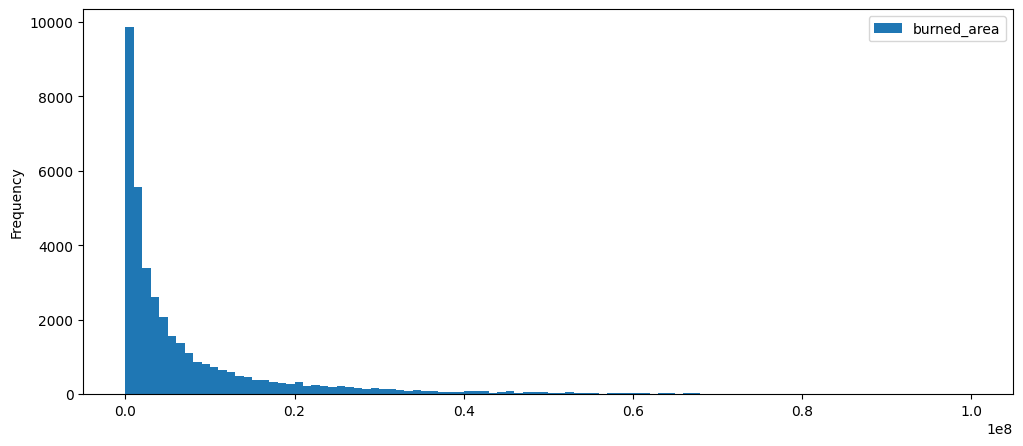

In [ ]:
fire_df[fire_df['burned_area']<=1*10**8].plot.hist(column=["burned_area"], bins=100, figsize=(12, 5));

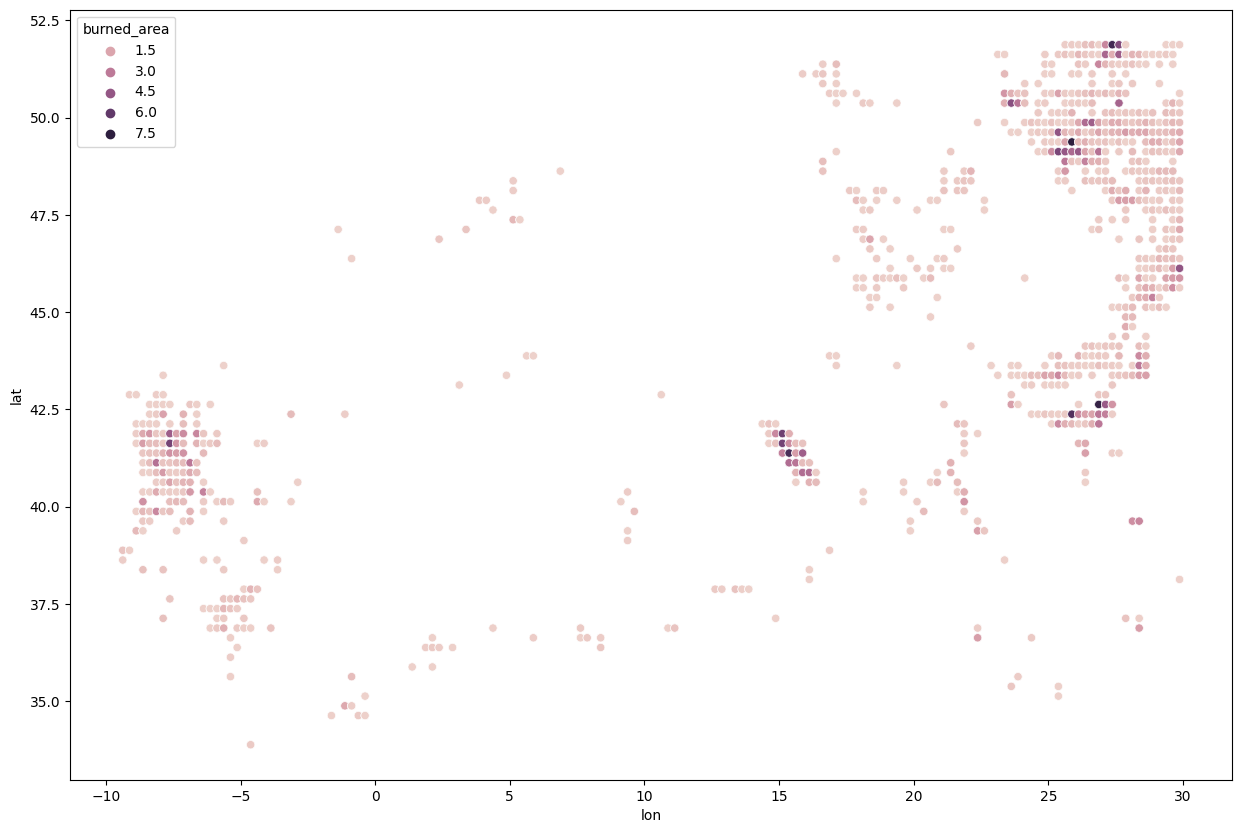

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=fire_df[(fire_df['burned_area']<=1*10**8) & (fire_df['year']==2002)], x='lon', y='lat', hue = 'burned_area');

map is not complete because when preprocessing I took only values where burnable area was larger than 1 and burned area was more than 1m2

## Climate data

In [ ]:
climate_df = pd.read_csv('../data/climate.csv')
climate_df = climate_df.drop(['Unnamed: 0'], axis=1)
climate_df = climate_df.rename(columns={"lon": "lon_bounds", "lat": "lat_bounds"})
climate_df

,lon_bounds,lat_bounds,year,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,pr_6,tas_7,tasmax_7,pr_7,tas_8,tasmax_8,pr_8
0,-10.00,33.00,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-10.00,33.25,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-10.00,33.50,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-10.00,33.75,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-10.00,34.00,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352578,50.00,51.00,2019,19.90,26.30,24.60,24.00,31.30,19.60,23.60,30.20,35.00,20.80,27.30,18.10
352579,50.00,51.25,2019,19.20,25.60,27.90,22.90,30.10,21.70,22.80,29.20,37.50,19.90,26.10,24.50
352580,50.00,51.50,2019,19.20,25.60,27.90,22.90,30.10,21.70,22.80,29.20,37.50,19.90,26.10,24.50
352581,50.00,51.75,2019,18.80,25.20,29.50,22.40,29.30,22.80,22.40,28.60,40.50,19.60,25.50,30.20


## Merging data

In [ ]:
fire_climate = fire_df.merge(
    climate_df,
    how='left',
    on=['lat_bounds', 'lon_bounds', 'year']
    )

fire_climate

,year,lon,lat,lon_bounds,lat_bounds,burned_area,fraction_of_burnable_area,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,pr_6,tas_7,tasmax_7,pr_7,tas_8,tasmax_8,pr_8
0,2001,-9.12,43.12,-9.25,43.25,"429,317.00",0.66,14.90,18.70,112.90,18.50,23.20,17.90,18.30,22.10,92.80,19.50,23.60,71.40
1,2001,-9.12,43.12,-9.00,43.00,"429,317.00",0.66,15.30,19.30,114.20,19.20,24.20,18.10,19.00,23.10,87.70,20.10,24.50,61.60
2,2001,-8.62,37.12,-8.75,37.25,"12,503,867.00",0.53,17.60,21.60,33.20,21.70,26.50,5.80,21.80,26.10,1.10,22.90,27.30,0.10
3,2001,-8.62,37.38,-8.75,37.50,"1,341,616.00",1.00,17.60,21.60,33.20,21.70,26.50,5.80,21.80,26.10,1.10,22.90,27.30,0.10
4,2001,-8.62,41.38,-8.75,41.50,"536,646.00",0.87,16.10,20.60,87.20,20.40,25.90,25.20,19.90,24.30,33.90,20.70,25.70,21.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38377,2019,29.88,48.62,30.00,48.50,"8,586,346.00",0.98,16.40,22.00,68.30,22.60,28.60,73.10,20.50,26.30,37.70,21.60,28.10,39.30
38378,2019,29.88,48.88,30.00,48.75,"6,225,101.00",0.96,16.10,21.70,74.30,22.20,28.10,68.70,20.30,26.30,38.40,21.10,27.80,36.60
38379,2019,29.88,49.12,30.00,49.00,"12,289,209.00",0.97,16.10,21.70,74.30,22.20,28.10,68.70,20.30,26.30,38.40,21.10,27.80,36.60
38380,2019,29.88,49.38,30.00,49.25,"321,988.00",0.98,15.70,21.10,79.80,21.90,27.90,66.40,19.50,25.30,42.50,20.40,26.90,28.50


In [ ]:
fire_climate_filtered = fire_climate.drop(['lat_bounds', 'lon_bounds'], axis=1).dropna().drop_duplicates()
fire_climate_filtered

,year,lon,lat,burned_area,fraction_of_burnable_area,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,pr_6,tas_7,tasmax_7,pr_7,tas_8,tasmax_8,pr_8
0,2001,-9.12,43.12,"429,317.00",0.66,14.90,18.70,112.90,18.50,23.20,17.90,18.30,22.10,92.80,19.50,23.60,71.40
1,2001,-9.12,43.12,"429,317.00",0.66,15.30,19.30,114.20,19.20,24.20,18.10,19.00,23.10,87.70,20.10,24.50,61.60
2,2001,-8.62,37.12,"12,503,867.00",0.53,17.60,21.60,33.20,21.70,26.50,5.80,21.80,26.10,1.10,22.90,27.30,0.10
3,2001,-8.62,37.38,"1,341,616.00",1.00,17.60,21.60,33.20,21.70,26.50,5.80,21.80,26.10,1.10,22.90,27.30,0.10
4,2001,-8.62,41.38,"536,646.00",0.87,16.10,20.60,87.20,20.40,25.90,25.20,19.90,24.30,33.90,20.70,25.70,21.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38371,2019,29.88,47.12,"536,646.00",0.98,17.10,21.80,41.30,23.80,29.20,50.00,22.50,27.70,24.70,23.50,29.20,30.70
38373,2019,29.88,47.62,"21,036,548.00",0.99,16.70,21.70,47.40,23.20,28.90,55.50,21.70,27.00,29.80,22.60,28.70,34.50
38375,2019,29.88,48.12,"268,323.00",0.98,16.60,22.00,61.20,23.00,28.90,66.70,21.20,26.70,32.90,22.30,28.70,34.70
38377,2019,29.88,48.62,"8,586,346.00",0.98,16.40,22.00,68.30,22.60,28.60,73.10,20.50,26.30,37.70,21.60,28.10,39.30


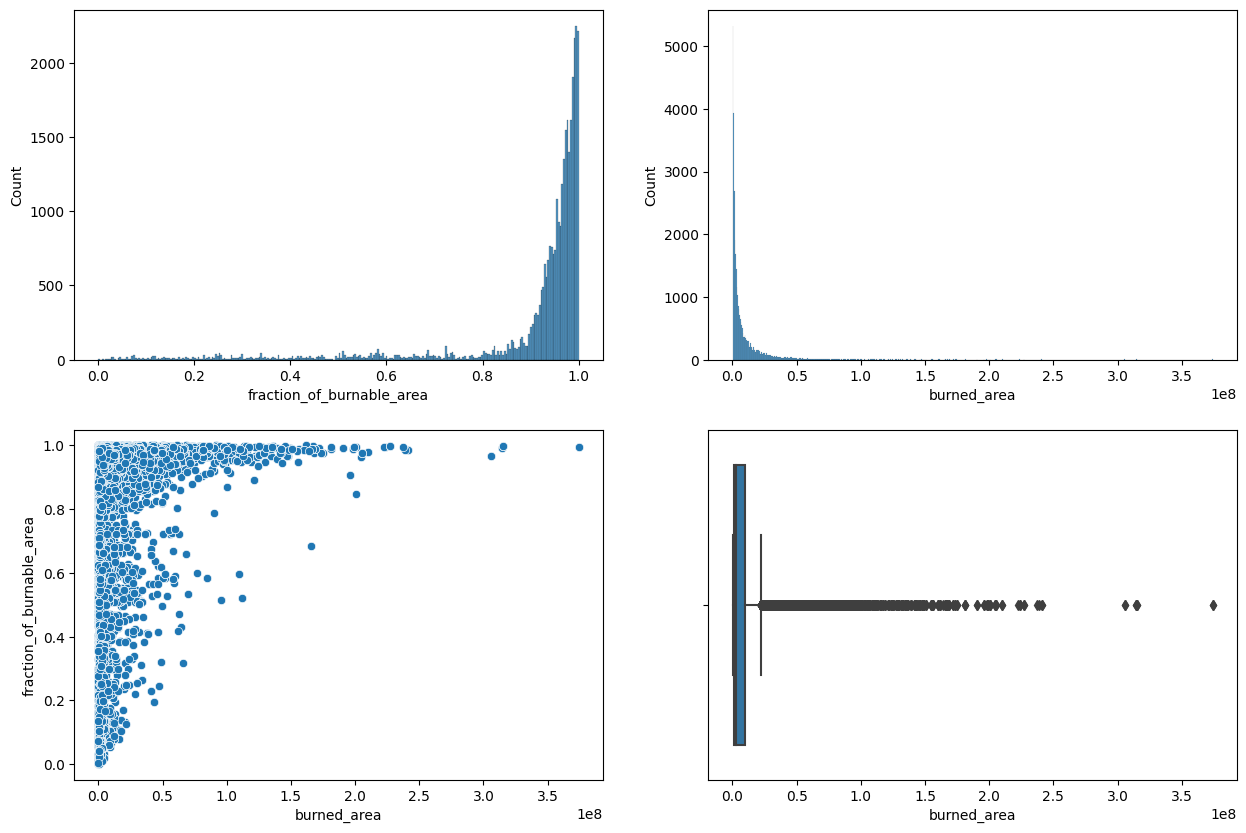

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(fire_climate_filtered['fraction_of_burnable_area'], ax=ax1)
sns.histplot(fire_climate_filtered['burned_area'], ax=ax2)
sns.scatterplot(data=fire_climate_filtered, x='burned_area', y='fraction_of_burnable_area', ax=ax3)
sns.boxplot(data = fire_climate_filtered, x= 'burned_area', ax=ax4)
plt.show();

 # filtering dataset

1. seems there is one outlier in burned area 
2. the distribution for 'fraction_of_burnable_area' is skewd and data wit less than 80% could be removed

In [ ]:
fire_climate_filtered = fire_climate_filtered[fire_climate_filtered['fraction_of_burnable_area'] > 0.9]
mask = (fire_climate_filtered['burned_area'] < 100_000_000) #& (y_train['burned_area'] > 100_000)
fire_climate_filtered = fire_climate_filtered[mask].reset_index(drop=True)
fire_climate_filtered.shape

(27408, 17)

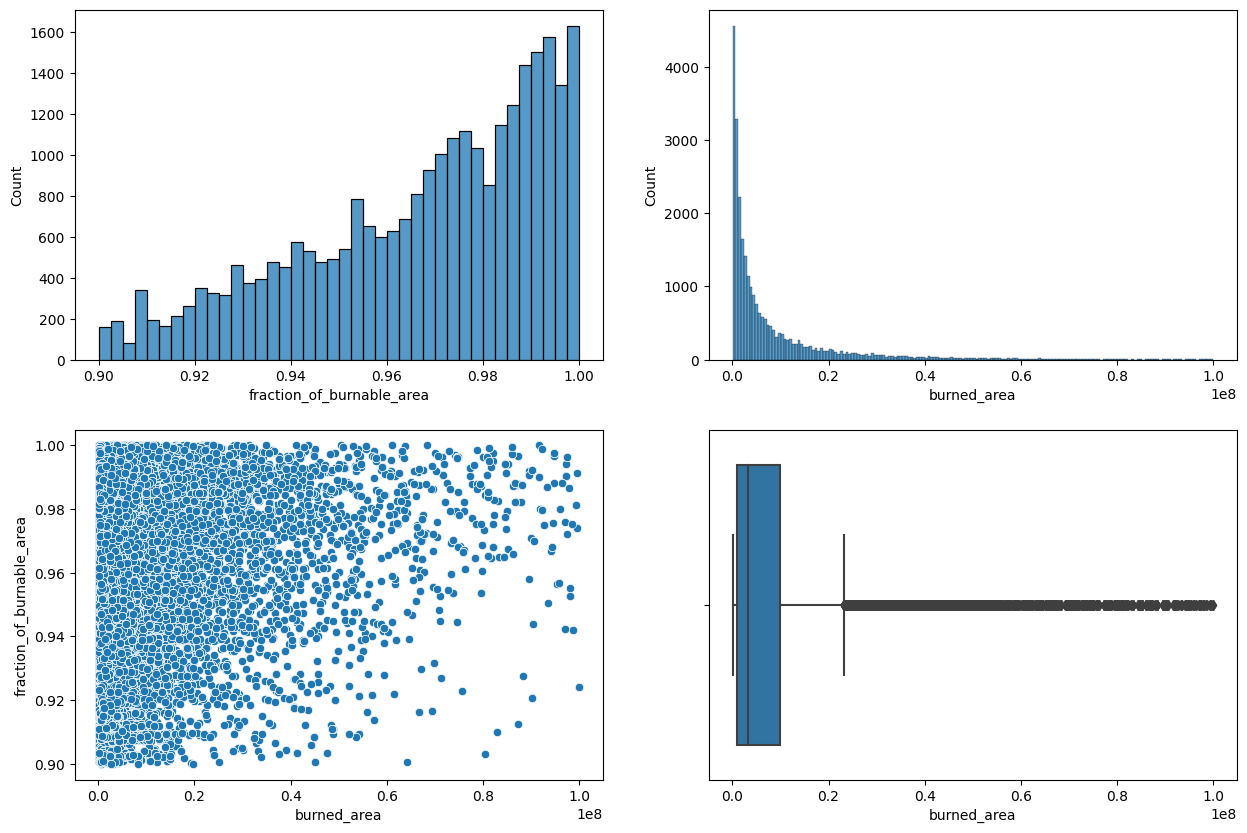

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(fire_climate_filtered['fraction_of_burnable_area'], ax=ax1)
sns.histplot(fire_climate_filtered['burned_area'], ax=ax2)
sns.scatterplot(data=fire_climate_filtered, x='burned_area', y='fraction_of_burnable_area', ax=ax3)
sns.boxplot(data = fire_climate_filtered, x= 'burned_area', ax=ax4)
plt.show();

I would not remove more of the burned area 'outliers' since the outliers are what we are actually looking for

# Splitting the data

In [ ]:
y = fire_climate_filtered['burned_area']
X = fire_climate_filtered.drop('burned_area', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

X_train:  (1372, 8)
y_train:  (1372,)


# Normalisation

## longitude and latitude

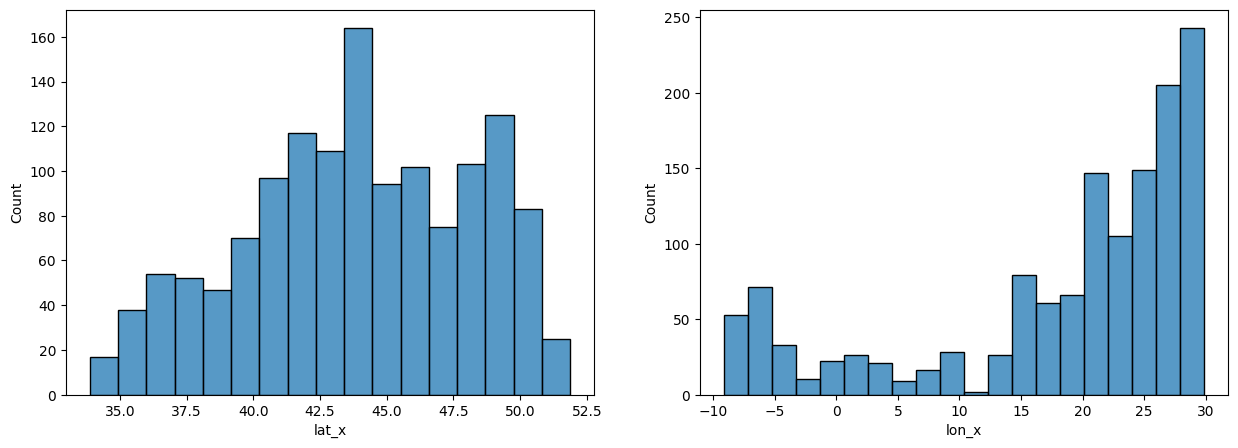

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(X_train['lat_x'], ax= ax1)
sns.histplot(X_train['lon_x'], ax= ax2);

the lon and lat columns need normalising but I am not sure what is the best approach.<br />
ChatGPT recommended to map longitude and latitude to x and y coordinates -> represents the data in a two-dimensional space

x = cos(lat) * cos(lon) <br />
y = cos(lat) * sin(lon)

In [ ]:
X_train['x'] = np.cos(X_train['lat_x']) * np.cos(X_train['lon_x'])
X_train['y'] = np.cos(X_train['lat_x']) * np.sin(X_train['lon_x'])
X_train = X_train.drop(['lat_x', 'lon_x'], axis =1).reset_index(drop = True)

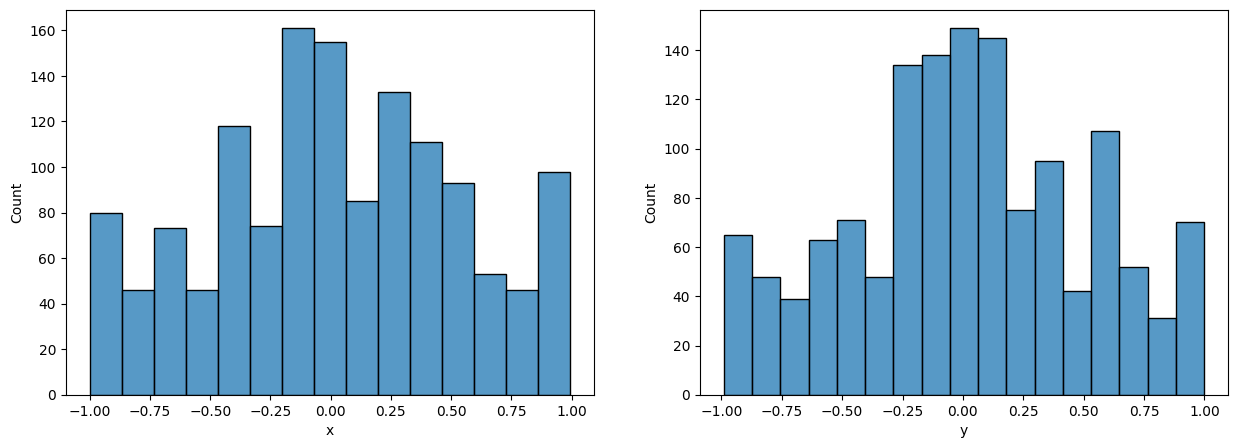

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(X_train['x'], ax= ax1)
sns.histplot(X_train['y'], ax= ax2);

this seems better, both coordinates have normal distribution

In [ ]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

X_train:  (1372, 8)
y_train:  (1372,)


## time columns

In [ ]:
# we have only one month atm so I am dropping it for now
X_train = X_train.drop('month', axis=1)

In [ ]:
# for now I am treating year as ordinal value. We will need to discuss how to treat it properly later
o_encoder = OrdinalEncoder(categories = [[2001, 2002, 2003, 2004, 2005,
                                         2006, 2007, 2008, 2009, 2010,
                                         2011, 2012, 2013, 2014, 2015, 
                                         2016, 2017, 2018, 2019]])

o_encoder.fit(X_train[['year']])
X_train['year'] = o_encoder.transform(X_train[['year']])

X_train.head()

,fraction_of_burnable_area,year,tas,tasmax,pr,x,y
0,0.974600,2.0,19.275000,25.800001,26.900000,-0.332135,0.299278
1,0.965926,14.0,20.300001,26.700000,50.550003,0.924698,-0.007158
2,0.976997,14.0,29.400002,38.300000,14.000000,0.718996,-0.440600
3,0.944083,6.0,25.150000,33.900000,0.225000,-0.165575,-0.544207
4,0.908564,13.0,21.675001,28.200000,102.950005,-0.547317,0.484464


# climate data

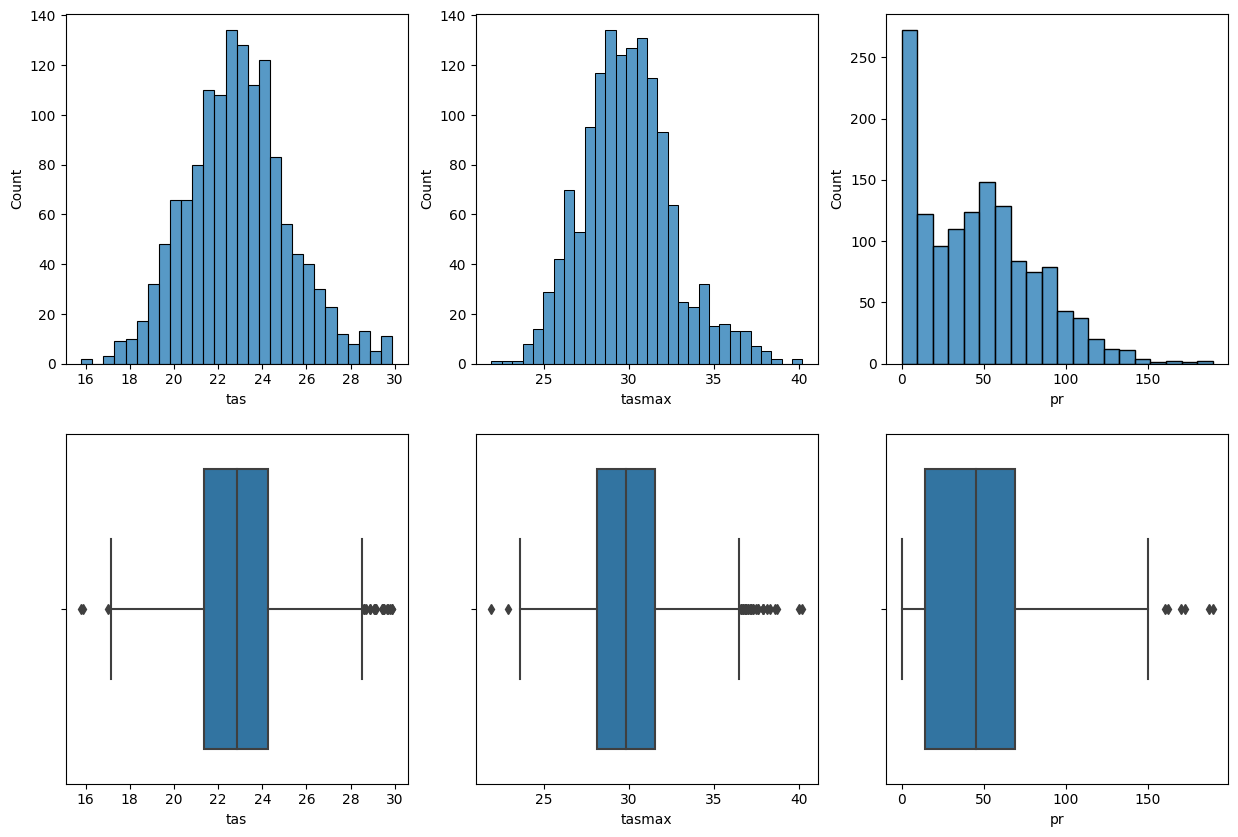

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(X_train['tas'], ax= ax1)
sns.histplot(X_train['tasmax'], ax= ax2)
sns.histplot(X_train['pr'], ax= ax3)


sns.boxplot(data = X_train, x= 'tas', ax=ax4)
sns.boxplot(data = X_train, x= 'tasmax', ax=ax5)
sns.boxplot(data = X_train, x= 'pr', ax=ax6);

tas and maxtas seem to have normal distribution but there are some outliers so I am using RobustScaler an all

In [ ]:
rb_scaler = RobustScaler()
X_train[['tas', 'tasmax', 'pr']] = rb_scaler.fit_transform(X_train[['tas', 'tasmax', 'pr']])

X_train.head()

,fraction_of_burnable_area,year,tas,tasmax,pr,x,y
0,0.974600,2.0,-1.240781,-1.176471,-0.333523,-0.332135,0.299278
1,0.965926,14.0,-0.885032,-0.911765,0.097211,0.924698,-0.007158
2,0.976997,14.0,2.273320,2.500000,-0.568469,0.718996,-0.440600
3,0.944083,6.0,0.798265,1.205882,-0.819351,-0.165575,-0.544207
4,0.908564,13.0,-0.407809,-0.470589,1.051565,-0.547317,0.484464


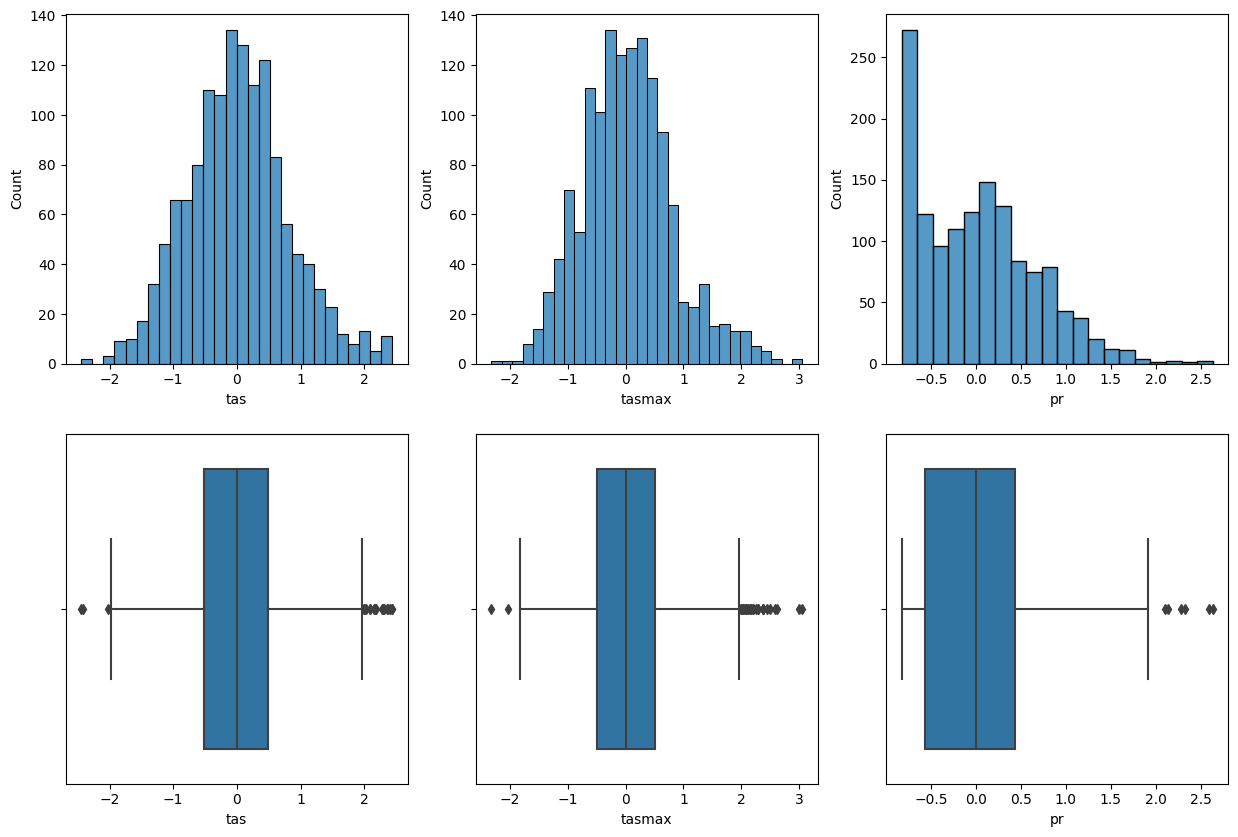

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(X_train['tas'], ax= ax1)
sns.histplot(X_train['tasmax'], ax= ax2)
sns.histplot(X_train['pr'], ax= ax3)


sns.boxplot(data = X_train, x= 'tas', ax=ax4)
sns.boxplot(data = X_train, x= 'tasmax', ax=ax5)
sns.boxplot(data = X_train, x= 'pr', ax=ax6);

data is rescaled

# fire data

### fraction_of_burnable_area
this is already in a range of 0 - 1

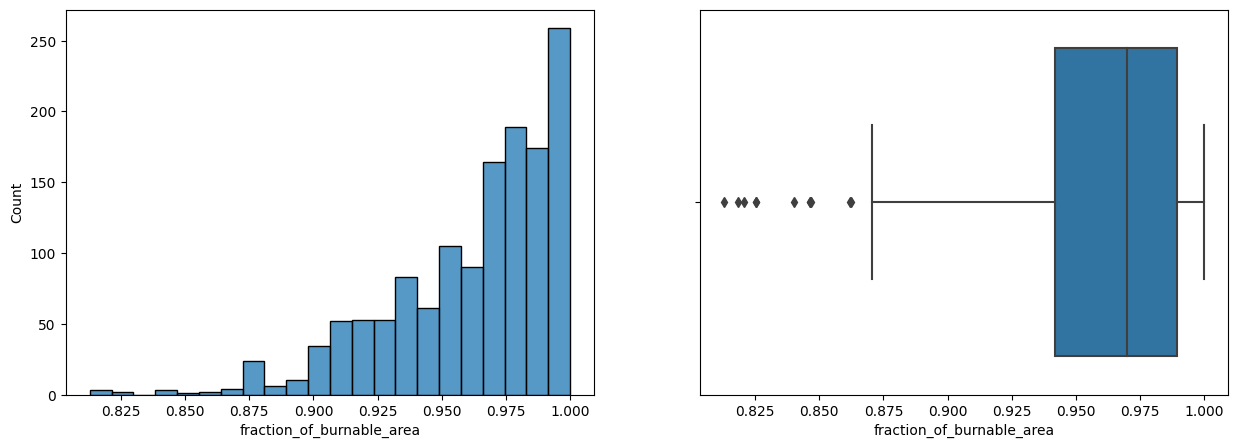

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X_train['fraction_of_burnable_area'], ax= ax1)
sns.boxplot(data = X_train, x= 'fraction_of_burnable_area', ax=ax2);

the distribution is not normal and there are outliers. I will perform Robust Scaer as well but not sure whether this is neccessary

In [ ]:
rb_scaler2 = RobustScaler()
X_train[['fraction_of_burnable_area']] = rb_scaler.fit_transform(X_train[['fraction_of_burnable_area']])

X_train.head()

,fraction_of_burnable_area,year,tas,tasmax,pr,x,y
0,0.096006,2.0,-1.240781,-1.176471,-0.333523,-0.332135,0.299278
1,-0.086769,14.0,-0.885032,-0.911765,0.097211,0.924698,-0.007158
2,0.146525,14.0,2.273320,2.500000,-0.568469,0.718996,-0.440600
3,-0.547086,6.0,0.798265,1.205882,-0.819351,-0.165575,-0.544207
4,-1.295579,13.0,-0.407809,-0.470589,1.051565,-0.547317,0.484464


### burned area -> y

In [ ]:
y_train.head()

1263     1556275.0
772      1234287.0
864      5473796.0
611     30052214.0
1023      858634.0
Name: burned_area, dtype: float64

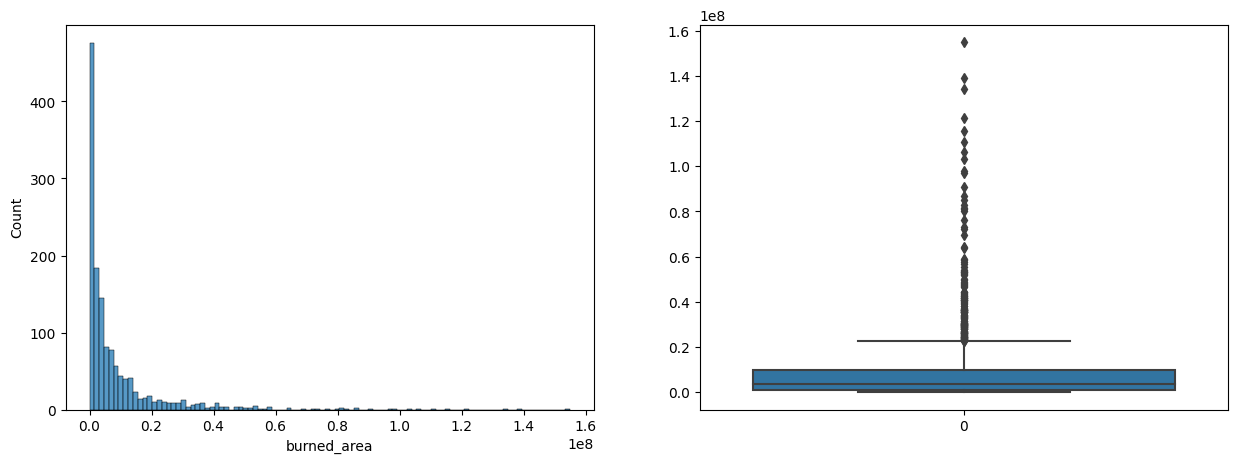

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(y_train, ax= ax1)
sns.boxplot(data = y_train, ax=ax2);

distribution is not normal and there are outliers but this is to be expected from th data and I dont knwo whether it should be treated